In [2]:
!pip install opencv-python

In [1]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

print(cv2.__version__)

4.10.0


In [3]:
# breaks down if there are russian symbols in the path and if there is no r before
img = cv2.imread(r"C:\Users\timab\JupiterNotebook\img.png")
#img = cv2.imread(r"C:\Users\timab\JupiterNotebook\63307a82aa99a.png")
#print(img)

In [4]:
def showImg(img: np.array):
    cv2.imshow('frame', img) # displays just white image when it's too large
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [30]:
print(img.shape)
h, w, _ = img.shape
imgResized = cv2.resize(img, (w * 2, h * 2))
showImg(imgResized)

(619, 817, 3)


In [38]:
bChannel = img[:, :, 0]
sliceImg = img[10 : 100, 50: 100, :]
sliceImg[:, :, 0] = 0 # effects initial image!
showImg(img)

In [32]:
imgFixedSize = cv2.resize(img, (100, 200))
print(imgFixedSize.shape)

(200, 100, 3)


In [5]:
def viewCamera(updateMls: int):
    camera = cv2.VideoCapture(0)
    while True:
        success, frame = camera.read()
        cv2.imshow('frame', frame)
        key = cv2.waitKey(updateMls) & 0xFF
        if key == ord('q'): break
    camera.release()
    cv2.destroyAllWindows()

In [6]:
viewCamera(100)

In [47]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
showImg(hsv[:, :, 2])

In [48]:
maskRed1 = cv2.inRange(hsv, (0, 150, 50), (15, 255, 255))
maskRed2 = cv2.inRange(hsv, (240, 150, 50), (255, 255, 255))
#maskLight = cv2.inRange(hsv, (0, 0, 205), (255, 255, 255))
#maskDark = cv2.inRange(hsv, (0, 0, 0), (255, 255, 50))
maskRed = np.zeros_like(maskRed1)
maskRed[np.where((maskRed1 == 255) | (maskRed2 == 255))] = 255
showImg(maskRed) # masks combined

In [5]:
cv2.namedWindow("mask")
def nothing(x):
    pass
cv2.createTrackbar("lv", "mask", 0, 255, nothing)
lv = cv2.getTrackbarPos("lv", "mask") # allows to make dynamic input in the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(maskRed1, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]

#filtered = np.zeros_like(maskRed1)
#filtered[np.where("some condition")] = 255

# to extract info
for i in range(1, output[0]):
    a = stats[i, cv2.CC_STAT_AREA]
    print(a)

295255
1340


In [50]:
h, w, _ = img.shape
copy1 = copy.deepcopy(img)
copied = cv2.resize(copy1, (w // 2, h // 2))
copiedHsv = cv2.cvtColor(copied, cv2.COLOR_BGR2HSV)
h, w, _ = copiedHsv.shape
slice = copiedHsv[:, :, 2]
slice[np.where(slice > 200)] = 255
copiedHsv[:, :, 2] = slice
#for hi in range(0, h):
#    for wi in range(0, w):
#        if copiedHsv[hi][wi][2] > 200: copiedHsv[hi][wi][2] = 255
showImg(cv2.cvtColor(copiedHsv, cv2.COLOR_HSV2BGR)) # reverse convertion is required before showing

In [31]:
kernel = np.ones((2, 2), np.uint8)
morphed = cv2.morphologyEx(maskRed, cv2.MORPH_OPEN, kernel) # erosion -> dilation (removal of small slim pieces but shape not preserved)
showImg(maskRed)
showImg(morphed)

In [ ]:
videoPath = "some.mp4"
camera = cv2.VideoCapture(videoPath)
_, background = camera.read() # assume camera start corresponds to background image
while True:
    success, frame = camera.read()
    if not success: # video restart
        camera.release()
        camera = cv2.VideoCapture(videoPath)
        continue

    ratio = 0.9
    background += cv2.addWeighted(background, ratio, frame, 1 - ratio, 0) # linear interpolated
    diff = cv2.absdiff(background, frame)
    # then inRange, morphology and so on
    cv2.imshow('background', background)
    cv2.imshow('diff', diff)
    
    key = cv2.waitKey(100) & 0xFF
    if key == ord('q'): break
camera.release()
cv2.destroyAllWindows()

In [51]:
def plot_dist(channel):
    fig, ax = plt.subplots()
    ax.hist(channel.ravel(), 25, [0, 256]) # creates 25 categories covering range 0-256 and creates histogram based on info

    fig.canvas.draw()
    dist = np.array(fig.canvas.renderer.buffer_rgba()) # get it as an image
    plt.close()
    return dist

In [ ]:
videoPath = "some.mp4"
camera = cv2.VideoCapture(videoPath)
while True:
    success, frame = camera.read()
    if not success: # video restart
        camera.release()
        camera = cv2.VideoCapture(videoPath)
        continue
    frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    frameHSV[:, :, 0] += 10 # or whatever, useless shift, overflaw accepted, shift value can be inputted via thackbar
    # cv2.add can be used to avoid overflow
    
    dist0 = plot_dist(frameHSV[:, :, 0])
    dist1 = plot_dist(frameHSV[:, :, 1])
    dist2 = plot_dist(frameHSV[:, :, 2])
    hists = np.concatenate((dist0, dist1, dist2), axis=0)
    cv2.imshow('diff', hists)
    
    key = cv2.waitKey(100) & 0xFF
    if key == ord('q'): break
camera.release()
cv2.destroyAllWindows()

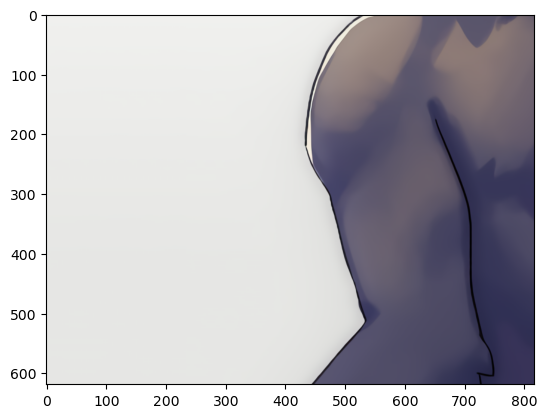

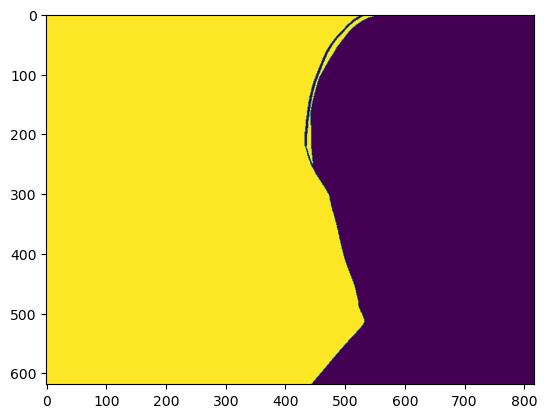

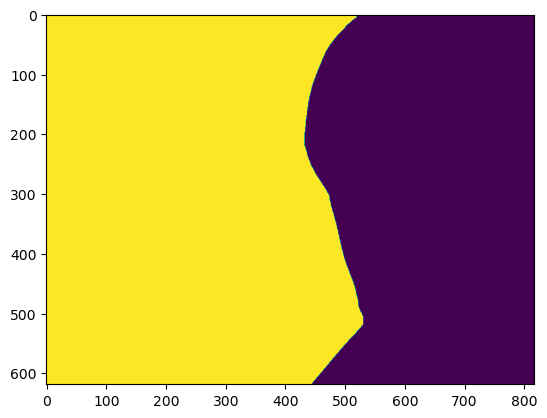

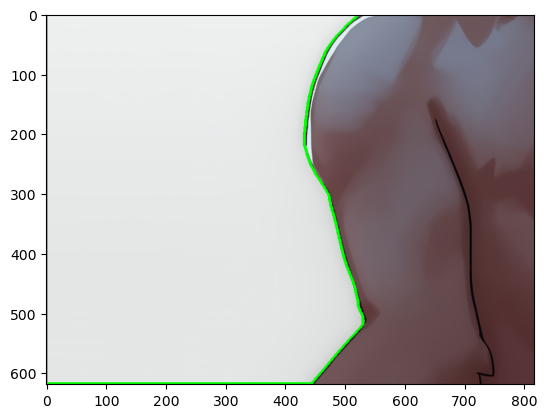

In [88]:
# blur can be used to erode details before further use
#blurred = cv2.blur(img, (2, 2))
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img) # blue -> red (due to shit like cv2 image handling - BGR)
plt.imshow(imgRGB) # has single slot for image before next plt.show
plt.show() # for whatever reason removes text <matplotlib.image.AxesImage at 0x290abfa3ce0>

# can be as well channels instead of gray
ret, otsu = cv2.threshold(imgGRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu)
plt.show()

kernel = np.ones((11, 11), np.uint8)
morphed = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel)

plt.imshow(morphed)
plt.show()

contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # contour part goes by the edge of the image
imgCopy = copy.deepcopy(img)
cv2.drawContours(imgCopy, contours, -1, (0, 255, 0), 3)
# c - specific contour, eps - an extent to which shape can be eroded (~0.01 usually)
# cv2.approxPolyDP(c, eps * cv2.arcLength(c, True), True)

plt.imshow(imgCopy)
plt.show()